In [2]:
from settings import *
%matplotlib inline
from matplotlib_venn import venn2
config_dict = process_config()
info_file = config_dict['data']['exp_design']
info = pd.read_csv(info_file, index_col=0)
count_file = config_dict['counts']['tpms_4']
figures_dir = config_dict['out_dir']['figures']
results_dir = config_dict['out_dir']['tables']
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")


info = info[info.experiment !="E1"]
info['position'] = info['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})



count_file = config_dict['counts']['tpms_30']
cnts = pd.read_csv(count_file, index_col=0)

cnts_norm =  cnts.apply(vis.invnorm)
info["samples"] = [case_to_name[i] for i in info["case"]]

de_hi_side = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
           "tables/2018-06-28-wt-bh-0-30_edited.csv"
    
de_9c1_side="/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
          "tables/2018-06-28-wt-b9-0-30_edited.csv"




/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/lib/config


In [3]:
de_mut= pd.read_csv(de_9c1_side, index_col=0)
de_wt= pd.read_csv(de_hi_side, index_col=0)
de_mut = get_rid_of_genbank(de_mut)
de_wt = get_rid_of_genbank(de_wt)
both = set(de_mut.index).intersection(set(de_wt.index))
mut_only = set(de_mut.index) - set(de_wt.index)
wt_only = set(de_wt.index)- set(de_mut.index) 
print("WT only: ", len(wt_only))
print("MUT only: ", len(mut_only))
print("Both: ", len(both))

WT only:  53
MUT only:  393
Both:  314


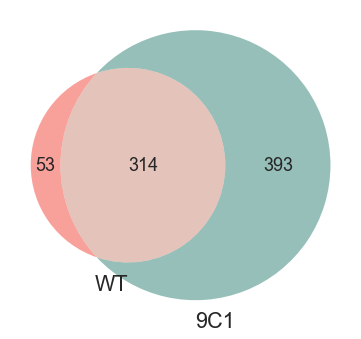

In [4]:
###
fig = plt.figure(figsize = (6,6))
venn2([set(de_wt.index), set(de_mut.index)], set_labels =(wt, mut), set_colors=(col1, col4), alpha=0.5,
     normalize_to=2.0)
plt.show()

In [3]:
de_wt_up = de_wt[de_wt[log2FoldChange] > 0]
de_mut_up = de_mut[de_mut[log2FoldChange] > 0]
de_wt_down = de_wt[de_wt[log2FoldChange] < 0]
de_mut_down= de_mut[de_mut[log2FoldChange] < 0]

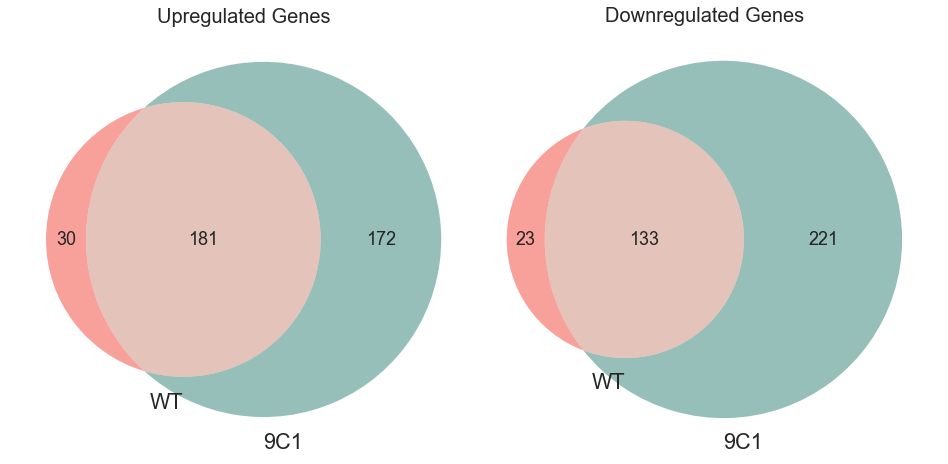

In [6]:
###
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 1.2],
                    xticklabels=[])
venn2([set(de_wt_up.index), set(de_mut_up.index)], set_labels =(wt, mut), set_colors=(col1, col4), alpha=0.5,
     normalize_to=1.0)
ax1.set_title("Upregulated Genes", fontsize=20)

ax2 = fig.add_axes([0.9, 0.5, 0.8, 1.2])
ax2.set_title("Downregulated Genes", fontsize=20)
venn2([set(de_wt_down.index), set(de_mut_down.index)], set_labels =(wt, mut), set_colors=(col1, col4), alpha=0.5,
     normalize_to=1.0)
fig.savefig(os.path.join(figures_dir, "Figure_6a.png"), dpi=300, bbox_inches="tight")

In [4]:
# Looking at common patterns of gene expression

df1 = de_wt.loc[both][[log2FoldChange, padj]]
df1.rename(index=str, columns={log2FoldChange: wt_lfc, padj: "{} padj".format(wt)}, inplace=True)

df2 = de_mut.loc[both][[log2FoldChange, padj, "Gene Name", "Function", "Pathway"]]
df2.rename(index=str, columns={log2FoldChange: mut_lfc,
                              padj: "{} padj".format(mut)}, inplace=True)
df = df1.merge(df2, left_index=True, right_index=True)
df.head()

,WT Log2 Fold Change,WT padj,9C1 Log2 Fold Change,9C1 padj,Gene Name,Function,Pathway
PMI0688,1.990235,5.451399e-09,2.436329,5.798909e-05,cspD,cold shock-like protein,NaN
PMI2109,-1.288029,3.963215e-05,-1.927527,6.714809e-06,mgtE,magnesium transporter,NaN
PMI2846,1.042999,3.162490e-02,2.220074,2.578143e-04,dppB,"dipeptide ABC transporter, permease protein",pmr02010 ABC transporters
PMI3550,2.321221,1.568663e-11,3.180143,9.389877e-08,fadB,fatty oxidation complex alpha subunit [includ...,"pmr00071 Fatty acid degradation, pmr00280 Va..."
PMI0606,1.502442,6.586933e-07,1.295794,3.404410e-02,bioD,dethiobiotin synthetase,"pmr00780 Biotin metabolism, pmr01100 Metabol..."


In [5]:
df_up = df[(df[wt_lfc]>0) | (df[mut_lfc] >0)].sort_index()
df_up = vis.remove_hypotheticals(df_up, "Function")
#df_up.to_excel(os.path.join(data_folder, "COMMON_UP_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))

df_down = df[(df[wt_lfc]<0) | (df[mut_lfc] <0)].sort_index()
df_down = vis.remove_hypotheticals(df_down, "Function")
#df_down.to_excel(os.path.join(data_folder, "COMMON_DOWN_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))


In [9]:
###
df_wt_only = de_wt.loc[wt_only][[log2FoldChange, padj, "Gene Name", "Function", "Pathway"]].sort_index()
df_wt_only.rename(index=str, columns={log2FoldChange: wt_lfc,
                              padj: "{} padj".format(wt)}, inplace=True)

df_wt_only.head()
df_wt_only.to_excel(os.path.join(data_folder, "Supplementary_Table_7_WT_ONLY_BEHIND_THE_DIENES_LINE.xlsx"))

df_mut_only = de_mut.loc[mut_only][[log2FoldChange, padj, "Gene Name", "Function", "Pathway"]].sort_index()
df_mut_only.rename(index=str, columns={log2FoldChange: mut_lfc,
                              padj: "{} padj".format(mut)}, inplace=True)
df_mut_only.head()
df_mut_only.to_excel(os.path.join(data_folder, "Supplementary_Table_8_9C1_ONLY_BEHIND_THE_DIENES_LINE.xlsx"))

In [63]:
print(2**df_up[wt_lfc].mean())
print(2**df_up[mut_lfc].mean())
print(2**abs(df_down[wt_lfc].mean()))
print(2**abs(df_down[mut_lfc].mean()))

2.751682654318509
4.2200119777738445
2.4958222118662565
3.4774328046304936


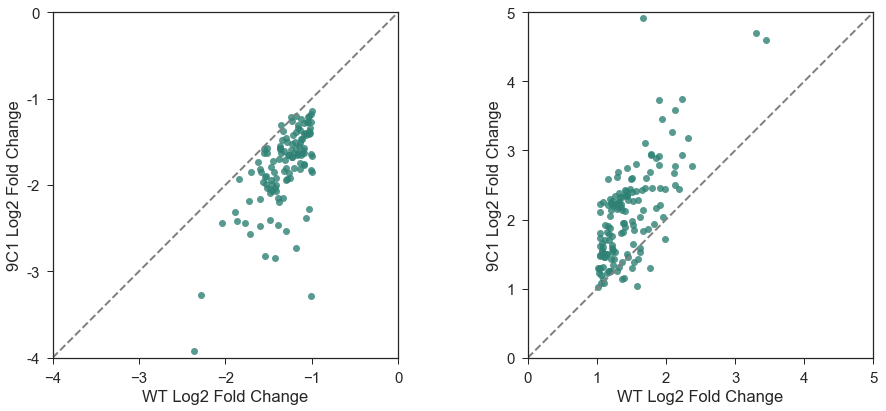

In [6]:
###
fig = plt.figure(figsize = (6,6))

ax1 = fig.add_axes([1.2, 0.5, 0.8, 0.8],)
s = sns.regplot(wt_lfc, mut_lfc, df_up, color=col4, fit_reg=False);
plt.plot([0,5], [0, 5], color="grey", linestyle='--', linewidth=2)
s.set(xlim=[0,5], ylim=[0,5],);

ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.8],)
s = sns.regplot(wt_lfc, mut_lfc, df_down, color=col4, fit_reg=False);
plt.plot([-4,0], [-4,0], color="grey", linestyle='--', linewidth=2)
s.set(xlim=[-4,0], ylim=[-4,0],);
s.set_yticks( [-4, -3, -2, -1,0]);
s.set_yticklabels([-4, -3, -2, -1,0]);

#fig.savefig(os.path.join(figures_folder, "2018-02-07-proteus_rnaseq_figure_6b.png"), dpi=300, bbox_inches="tight")

In [6]:
fimbrial = vis.get_subset_genes(df_up, "fimbria", [wt_lfc, mut_lfc], "Function").index
biotin = vis.get_subset_genes(df_up, "iotin", [wt_lfc, mut_lfc],"Pathway").index
zap = vis.get_subset_genes(df_up, "zap", [wt_lfc, mut_lfc],"Gene Name").index
glutamate = vis.get_subset_genes(df_up, "glutamate", [wt_lfc, mut_lfc], "Function").index
stress = vis.get_subset_genes(df_up, "stress",[wt_lfc, mut_lfc], "Function").index
pp = vis.get_subset_genes(df_up, "peptide", [wt_lfc, mut_lfc], "Function").index

#-------------------------------------------------------------------------
ribosome = vis.get_subset_genes(df_down, "ribosom",[wt_lfc, mut_lfc], "Function" ).index
TonB = vis.get_subset_genes( df_down, "TonB",[wt_lfc, mut_lfc], "Function").index
purine = vis.get_subset_genes( df_down, "Purine", [wt_lfc, mut_lfc],"Pathway").index
#-------------------------------------------------------------------------
sef = ["PMI1117", "PMI1118", "PMI1119", "PMI1120", "PMI1121"]
ids = ["PMI2990", "PMI2991", "PMI2992", "PMI2993", "PMI2994", "PMI2995", "PMI2996"]
orphans = ["PMI0173", "PMI0174", "PMI0175", "PMI0176"]
pef = ["PMI0750", "PMI0751", "PMI0752",
        "PMI0753", "PMI0754", "PMI0755", "PMI0756", "PMI0757"] # PMI0758 is not present in latest annotation 

In [7]:
up = {"T1SS":zap, "Glutamate Metabolism":glutamate, 
      "Biotin Synthesis":biotin, "Stress proteins":stress, "Fimbria":fimbrial, 
      "Oligo/Dipeptide importers":pp}
down = {"Ribosomal Proteins":ribosome, "Purine Metabolism":purine, "TonB-dependent Receptors":TonB}

In [8]:
#...
def join_subset_means(label_subset_dict, meta, rpkms, samples, my_cmap):
    means_list = []
    for label, subset in label_subset_dict.items():
        means_list.append(find_subset_mean(label, subset, meta, rpkms, samples, my_cmap))

    return pd.concat(means_list, axis=1, keys=[s.name for s in means_list]).T


def find_subset_mean(label, subset, meta, rpkms, samples, my_cmap):
    cts = draw_heatmap_of_subset(subset.index, meta, label,
                                 rpkms, samples, my_cmap, draw=False).mean()
    cts.name = label
    return cts

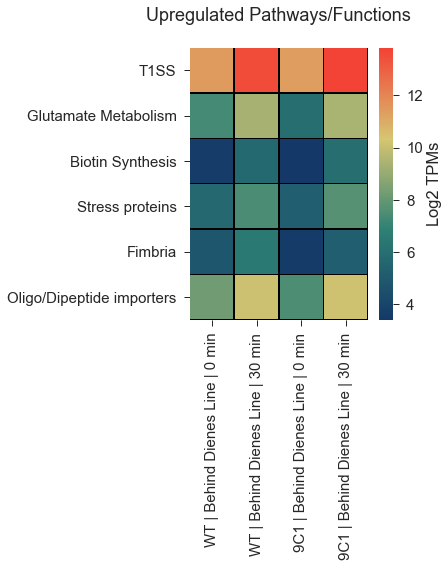

In [9]:
fig = vis.join_subset_means(up, cnts, info,  cases=["Case12", "Case7", "Case11", "Case8"],
                            names=case_to_name, draw=True, fs=(4,5), my_cmap=my_cmap)
plt.title("Upregulated Pathways/Functions\n");
fig.savefig(os.path.join(figures_dir, "Figure_6c_i.png"), dpi=300, bbox_inches="tight")

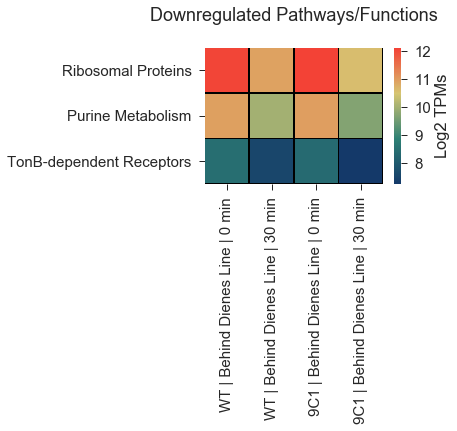

In [10]:
fig = vis.join_subset_means(down, cnts, info, names = case_to_name,
                            cases=["Case12", "Case7", "Case11", "Case8"], draw=True, fs=(4,2.5), my_cmap=my_cmap)
plt.title("Downregulated Pathways/Functions\n");
fig.savefig(os.path.join(figures_dir, "Figure_6c_ii.png"), dpi=300, bbox_inches="tight")

In [ ]:
###############################----delete below this line after finishing fig 7

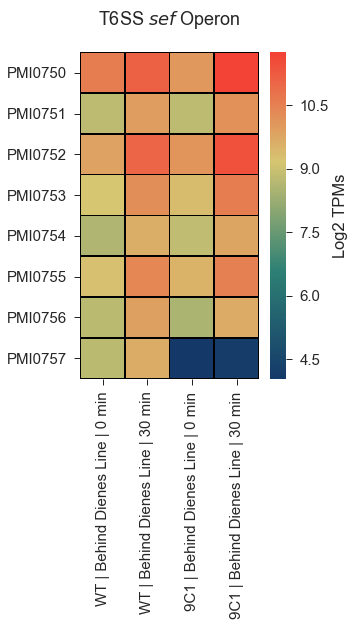

In [129]:
fig, _ = draw_heatmap_of_subset(cnts, info,  pef, subset_name="T6SS $\itpef$ Operon\n",
                          draw=True, fs=(4,6))
plt.title("T6SS $\itsef$ Operon\n")
fig.savefig(os.path.join(figures_dir, "Figure_6d_i.png"), dpi=300, bbox_inches="tight")

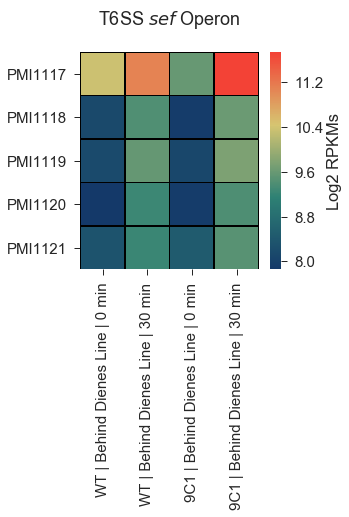

In [12]:
fig = vis.draw_heatmap_of_subset(t6ss_operon_1, meta, "T6SS $\itsef$ Operon\n",
                          rpkms, samples, my_cmap, (4,4))
#plt.title("T6SS $\itsef$ Operon\n")
fig.savefig(os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_6d_ii.png"), dpi=300, bbox_inches="tight")

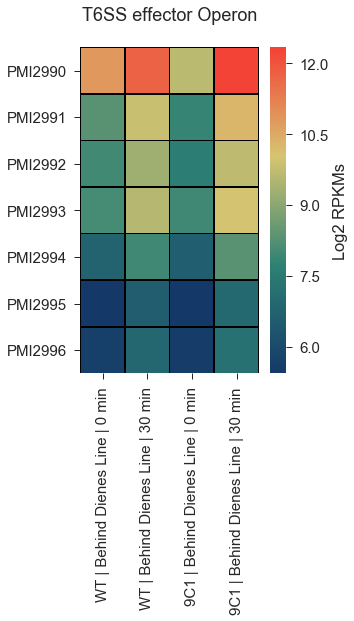

In [21]:
fig = vis.draw_heatmap_of_subset(t6ss_operon_2, meta,"T6SS effector Operon\n",
                          rpkms, samples, my_cmap, (4,6))
fig.savefig(os.path.join(figures_folder, "2018-05-23-proteus_rnaseq_figure_6d_iii.png"), dpi=300, bbox_inches="tight")


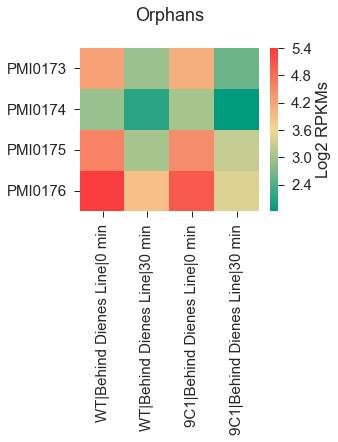

In [18]:
fig = vis.draw_heatmap_of_subset(orphans, meta,"Orphans\n",
                          rpkms, samples, my_cmap, (4,3))
fig.savefig(os.path.join(figures_folder, "2018-05-23-proteus_rnaseq_figure_4g.png"), dpi=300, bbox_inches="tight")


In [29]:
df3 = df3.sort_values("log2FoldChange", ascending=False)
df3

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
PMI2990,15808.158995,2.485689,0.327984,7.578684,3.490785e-14,4.837422e-12
PMI2659,890.245325,2.446922,0.365521,6.694336,2.166532e-11,1.530591e-09
PMI3343,1199.071422,2.307460,0.458517,5.032444,4.842650e-07,8.348358e-06
PMI1006,3116.108955,2.245087,0.409768,5.478919,4.279310e-08,1.109234e-06
PMI1390,276.490251,2.173738,0.346134,6.280054,3.384550e-10,1.816643e-08
PMI2931,267.995834,2.110744,0.396987,5.316910,1.055442e-07,2.462396e-06
PMI3093,1394.266270,2.104387,0.294752,7.139509,9.366495e-13,8.797580e-11
PMI1592,6270.640770,2.051703,0.501668,4.089762,4.318154e-05,3.449736e-04
PMI2203,749.043260,2.011061,0.330208,6.090287,1.127082e-09,5.076097e-08
PMI0360,1606.921641,1.997442,0.433899,4.603476,4.154964e-06,5.006802e-05


In [44]:
# Looking at WT alone

wt_info_file = os.path.join(data_folder, "de_genes_behind_line_WT_only_info.tab")

wt_info = pd.read_csv(wt_info_file, sep="\t", header=None, index_col=0,
                        names=["gene_name", "function", "pathway"])

wt_info = wt_info[2:]
fx = wt_info.function
fx = fx.str.replace("\(GenBank\)", "")
wt_info.function = fx

wt_info
wt_de_only = de_wt.loc[wt_only]
wt_de_only.rename(index=str, columns={"baseMean": "{} Mean Expression".format(wt), 
                               "log2FoldChange": wt_lfc,
                                     }, inplace=True)
wt_de_only = wt_de_only[[wt_lfc,"padj"]]
wt_de_only = wt_de_only.merge(wt_info, how="left", left_index=True, right_index=True).sort_index()
wt_de_only = remove_hypotheticals(wt_de_only)
wt_de_only
wt_de_only.to_excel(os.path.join(data_folder, "WT_SPECIFIC_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))

# Look at tellurite and cys operon

In [45]:
# Tellurite
ter = get_subset_genes(wt_de_only, "tellurite", col_return=["gene_name",wt_lfc])
ter

dline_meta = meta[meta["group.ID"].isin(["Case7", "Case8", "Case11", "Case12"])]
dline_meta
ter_rpkms = dline_meta.merge(rpkms.loc[ter.index][dline_meta.index].T, left_index=True, right_index=True)
operon_means = {}
for gene in ter.index:
    operon_means[gene] = {}
    for case in ter_rpkms["group.ID"].unique():
        m = round(ter_rpkms[ter_rpkms["group.ID"] == case][gene].mean(),2)
        operon_means[gene][case] = m
t = pd.DataFrame(operon_means).T
t = t[["Case12", "Case7", "Case11", "Case8"]]
t.rename(index=str, columns={c:samples[c] for c in  t.columns}, inplace=True)
t

,WT|Behind Dienes Line|0 min,WT|Behind Dienes Line|30 min,9C1|Behind Dienes Line|0 min,9C1|Behind Dienes Line|30 min
PMI2384,491.92,1115.08,831.52,1153.03
PMI2385,382.75,967.53,676.80,1020.99
PMI2386,217.34,591.80,387.49,542.00
PMI2387,147.75,458.50,298.51,442.11
PMI2388,346.74,877.24,650.40,1071.68


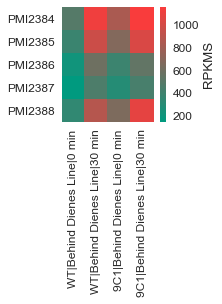

In [46]:
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col2, col1], N=256)
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.2],)
sns.heatmap(t,cmap = my_cmap, cbar_kws = {'use_gridspec':True,'location':"right",
                                  'label': 'RPKMS',});

In [145]:
rpkms.loc[ter.index][dline_meta.index].T

,PMI2384,PMI2385,PMI2386,PMI2387,PMI2388
76073,942.44,712.82,478.03,322.53,800.21
76074,1301.85,1115.99,674.43,588.67,981.26
76075,1100.96,1073.78,622.95,464.30,850.26
76076,1206.13,1079.76,537.30,428.22,1403.33
76077,1338.09,955.42,582.91,481.09,1132.72
76078,914.88,1027.79,505.78,417.03,678.99
76085,728.46,565.36,328.88,246.40,541.41
76086,781.29,600.76,311.43,243.72,550.81
76087,984.81,864.28,522.16,405.42,858.98
76088,564.89,457.24,244.50,169.73,389.53


In [80]:
# Looking at 9C1 alone

# Looking at WT alone

mut_info_file = os.path.join(data_folder, "de_genes_behind_line_9C1_only_info.tab")

mut_info = pd.read_csv(mut_info_file, sep="\t", header=None, index_col=0,
                        names=["N", "gene_name", "function", "pathway"])

fx = mut_info.function
fx = fx.str.replace("\(GenBank\)", "")
mut_info.function = fx
mut_info
mut_de_only = de_mut.loc[mut_only]
mut_de_only.rename(index=str, columns={"baseMean": "{} Mean Expression".format(mut), 
                               "log2FoldChange": mut_lfc,
                                     }, inplace=True)
mut_de_only = mut_de_only[[mut_lfc,"padj"]]
mut_de_only = mut_de_only.merge(mut_info, how="left", left_index=True, right_index=True).sort_index()
mut_de_only = remove_hypotheticals(mut_de_only)
mut_de_only_up = mut_de_only[mut_de_only[mut_lfc] > 0]
mut_de_only_down = mut_de_only[mut_de_only[mut_lfc] < 0]
mut_de_only_down
mut_de_only_up.to_excel(os.path.join(data_folder, "9C1_UP_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))
mut_de_only_down.to_excel(os.path.join(data_folder, "9C1_DOWN_CHANGES_IN_GENE_EXPRESSION_BEHIND_THE_DIENES_LINE.xlsx"))

#Look at mre rod flagella

